# Optical Character Recognition (OCR)

Optical Character Recognition, or OCR, is a technology that enables you to convert different types of documents, such as scanned paper documents, PDF files or images captured by a digital camera into editable and searchable data. In this section we will explore some basics of the same.

MINST database (http://yann.lecun.com/exdb/mnist/) is a great dataset that is publicly available to train OCR algorithms. However we will take a short cut and use the digits dataset that comes with scikit learn. We are going to compare a couple of different learners


## Loading data

Each data point is simply each pixel value within an 8x8 grid:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape
print(digits.images.shape)
# Sample image
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


## Visualizing data

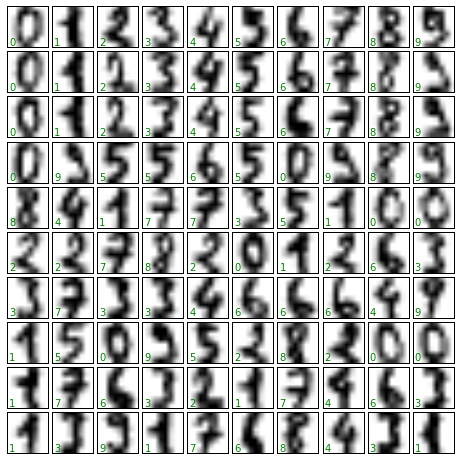

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

## Data for our algorithms

Most algorithms in scikit expect data as two dimensional numpy arrays. Luckily scikit learn load_digits does most of this work for us. However if you are using the MINST data set, then you might want to reshape your arrays to be two dimensional. Say do something like:

### CODING TIP: 
Xtrain = train_dataset.reshape(len(train_dataset),-1)

In [4]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [5]:
# The target label
print(digits.target)

[0 1 2 ..., 8 9 8]


## Classification

Let's prepare to run some classification on the digits data set. As a first step we want to split the data in training and test data sets.

Discussion:
* Why we need to training data sets and test data sets ? 
* Why not test on training data set ?
* How much overlap should there be between training and test data sets ?

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

((1347, 64), (1347,), (450, 64), (450,))


### Logistic Regression

Let's start with a simple logistic regression classifier.

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

What is our prediction accuracy ? How best to see it ?
* Accuracy score
* Confusion Matrix

In [8]:
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.946666666667
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


Let's visualize how we did. We will mark mistakes in red:

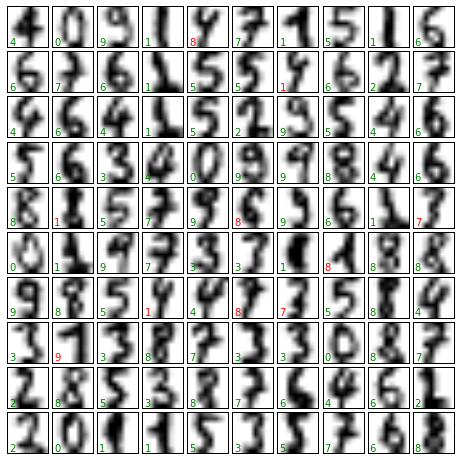

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

As you can see several mistakes are what even we would get wrong, while doing a visual inspection.

### Support Vector Machines (SVM)

Let's now try a different classifier. SVMs are rather good at things like handwriting recognition, as good as neural networks.

Possible Discussion:
* This is a potential place to introduce some bits of skflow (or just a taste of it)

In [10]:
from sklearn.svm import SVC # "Support Vector Classifier"
svm = SVC(kernel='linear')
svm.fit(Xtrain, ytrain)
ypred= svm.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.973333333333
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  1  0  0  1  0]
 [ 0  0  0  0 37  0  0  0  3  0]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 38  1]
 [ 0  0  0  1  0  1  0  1  0 36]]


### Decision Trees / Random Forests

Random forests are built on decision trees. Let's talk about decision trees first. Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification. The binary splitting makes this extremely efficient. As always, though, the trick is to ask the right questions. This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=999)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

0.926666666667
[[41  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  1  0]
 [ 0  1  1 44  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  2  1  0]
 [ 0  2  0  1  1 47  0  0  0  1]
 [ 0  0  1  0  1  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  4  1  0  0  0  1  0 33  1]
 [ 0  0  0  2  2  1  0  0  5 29]]


## Segway to TensorFlow

What is TensorFlow ? Well at a 100K feet level it is a computational framework for distributed machine learning. Well what does that mean ? It means it is a framework that has built in efficient basic computational constructs (viz. matrix manipulation, softmax computations) and an expressive graph based descriptor language that makes it real easy to express complex machine learning algorithms. 

OCR is a problem that is particularly suited to neural networks. So let's see how we could use tensorflow to do a quick model and measure its accuracy. This section is intended to give you a quick flavor of tensorflow. So do not worry as yet if you cannot get all of it.

We will use Stochastic Gradient Descent (SGD) combined with 1-hidden layer neural network with rectified linear units nn.relu()(https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes.

Reformat into a shape that's more adapted to the models we're going to train:
* data as a flat matrix,
* labels as float 1-hot encodings.

In [12]:
image_size = 8
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(Xtrain, ytrain)
test_dataset, test_labels = reformat(Xtest, ytest)
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (1347, 64), (1347, 10))
('Test set', (450, 64), (450, 10))


TensorFlow works like this:
* First you describe the computation that you want to see performed: what the inputs, the variables, and the operations look like. These get created as nodes over a computation graph. This description is all contained within the block below:

    
    with graph.as_default():
    ...

* Then you can run the operations on this graph as many times as you want by calling session.run(), providing it outputs to fetch from the graph that get returned. This runtime operation is all contained in the block below:
    
    
    with tf.Session(graph=graph) as session:
    ...
    
Let's load all the data into TensorFlow and build the computation graph corresponding to our training. We create a Placeholder node which will be fed actual data at every call of session.run().

In [14]:
batch_size = train_dataset.shape[0]
hidden_units = 1024
    
graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(test_dataset, dtype=tf.float32)

  # Stage 1 - Training computation.
  weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_units]))
  biases1 = tf.Variable(tf.zeros([hidden_units]))
  hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

  # Final stage
  weights2 = tf.Variable(tf.truncated_normal([hidden_units, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
  logits = tf.matmul(hidden1, weights2) + biases2
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  test_prediction = tf.nn.softmax(
    tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1), 
              weights2) + biases2)

Let's run it:

In [16]:
num_steps = 3001

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : train_dataset, tf_train_labels : train_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 1661.160889
Minibatch accuracy: 9.9%
Minibatch loss at step 500: 1.488157
Minibatch accuracy: 41.4%
Minibatch loss at step 1000: 0.907989
Minibatch accuracy: 61.5%
Minibatch loss at step 1500: 0.828375
Minibatch accuracy: 63.5%
Minibatch loss at step 2000: 0.697961
Minibatch accuracy: 69.0%
Minibatch loss at step 2500: 0.637083
Minibatch accuracy: 70.5%
Minibatch loss at step 3000: 0.621300
Minibatch accuracy: 71.0%
Test accuracy: 69.1%
